In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

df1 = pd.read_csv("NSW_Road_Crash.csv")
df1.dropna()
df1 = df1.rename(columns={'Direction': 'cardinal_direction_name'})
df1 = df1.rename(columns={'Year of crash': 'year'})

df2 = pd.read_csv("Traffic_Volume_Viewer.csv")
mask = df2['classification_type'].isin(['LIGHT VEHICLES', 'HEAVY VEHICLES']) & ~df2['cardinal_direction_name'].str.contains('AND|BOTH') & ~df2['period'].isin(['ALL DAYS', 'WEEKDAYS','PUBLIC HOLIDAYS']) & (df2['year'] >= 2017)
df2_new = df2[mask]

df2.dropna()
df2_new.head()

names = df2_new['period'].unique()
print(names)

['AM PEAK' 'OFF PEAK' 'PM PEAK' 'WEEKENDS']


In [2]:
#function to change String format
def String_format(name):
    if isinstance(name, str):
        new_str = name.capitalize()
        return new_str

String_format("MUAZ")

def abreviation(word,l1,l2):
    #search for the word in l1 and return i index of l2
    i = 0
    while i < len(l1):
       if word == l1[i]:
           return l2[i]
       else:
           i += 1
           continue 

In [3]:
# Street Definitions
unique_street_types = df1['Street type'].unique()
unique_street_types_list = list(unique_street_types)
full_street_type = ['Road','Way','Highway','Drive','Parade','Street','Avenue','Expressway','0','Distributor','Parkway','Court','Lane','Place','Boulevard','Close','Circuit','Crescent','Terrace','Bypass','Mall','Trail','Promenade','Grove','Track','Square','Esplanade','Gardens','Glen','Route','Driveway','Causeway','Loop','Chase','Access','Row','Walk','0']

# Time Definitions 
unique_times = df1['Two-hour intervals'].unique()
unique_times_list = list(unique_times)
time_periods = ['PM PEAK','OFF PEAK','PM PEAK','OFF PEAK','OFF-PEAK','OFF-PEAK','AM PEAK','AM PEAK','PM PEAK','OFF PEAK','OFF PEAK','OFF PEAK','0','0']

valid_directions = ['NORTH', 'SOUTH', 'EAST', 'WEST']
df1["cardinal_direction_name"] = df1["cardinal_direction_name"].str.upper()

unique_vehicle_types = df1['Key TU type'].unique()
unique_vehicle_types_list = list(unique_vehicle_types)
vehicle_types = ['LIGHT VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'HEAVY VEHICLES', 'NaN', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'NaN', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'NAN', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'HEAVY VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES', 'LIGHT VEHICLES']

#Loop through the dataset
l1 = unique_street_types
l2 = full_street_type

l3 = unique_vehicle_types_list
l4 = vehicle_types

formatted_rows = []
formatted_rows2 = []
day_period = []
cardinal_direction_name = [] 

# CRASH DATASET
for index, row in df1.iterrows():
    if not pd.isnull(row["Street Crash"]) and not pd.isnull(row["Street type"]):
        formatted_string = String_format(row["Street Crash"]) + " " + abreviation(row["Street type"], l1, l2)
        formatted_rows.append(formatted_string)
    else:
        formatted_rows.append(None)
    
    if row['Day of week of crash'] in ['Saturday','Sunday']: 
        day_period_string = 'WEEKENDS'
        
    else: 
        day_period_string = abreviation(row["Two-hour intervals"], unique_times_list, time_periods)
        
    day_period.append(day_period_string)
    
    formatted_string2 = abreviation(row["Key TU type"], l3, l4)
    formatted_rows2.append(formatted_string2)
    
df1["road_name"] = formatted_rows
df1["period"] = day_period
df1["classification_type"] = formatted_rows2
df1 = df1[df1['cardinal_direction_name'].isin(valid_directions)]

df1.head()

,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,year,Month of crash,Day of week of crash,Two-hour intervals,Street Crash,Street type,...,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured,road_name,period,classification_type
0,1122708.0,Fatal,Fatal,2017.0,2017.0,January,Monday,18:00 - 19:59,HOLLOWAYS,RD,...,Station wagon,NaN,1.0,1.0,0.0,0.0,0.0,Holloways Road,PM PEAK,LIGHT VEHICLES
1,1122709.0,Fatal,Fatal,2017.0,2017.0,January,Monday,12:00 - 13:59,PUTTY,RD,...,Motorcycle,Light truck,3.0,1.0,1.0,1.0,0.0,Putty Road,OFF PEAK,LIGHT VEHICLES
3,1123942.0,Fatal,Fatal,2017.0,2017.0,January,Thursday,10:00 - 11:59,VARDYS,RD,...,Semi-trailer,Pedestrian,2.0,1.0,0.0,1.0,0.0,Vardys Road,OFF PEAK,HEAVY VEHICLES
4,1123948.0,Fatal,Fatal,2017.0,2017.0,January,Saturday,12:00 - 13:59,PRINCES,HWY,...,Car (sedan/hatch),4 wheel drive,2.0,1.0,2.0,3.0,0.0,Princes Highway,WEEKENDS,LIGHT VEHICLES
7,1123953.0,Fatal,Fatal,2017.0,2017.0,January,Wednesday,20:00 - 21:59,HALLS CREEK,RD,...,Light truck,NaN,1.0,1.0,0.0,0.0,0.0,Halls creek Road,OFF-PEAK,HEAVY VEHICLES


In [4]:
# Filter both crash and traffic volume dataframe based on Road Name Column
df_crash = df1[df1['road_name'].isin(df2_new['road_name']) & 
               df1['year'].isin(df2_new['year']) &
               df1['period'].isin(df2_new['period']) & 
               df1['classification_type'].isin(df2_new['classification_type']) &
               df1['cardinal_direction_name'].isin(df2_new['cardinal_direction_name'])]

df_traffic = df2_new[df2_new['road_name'].isin(df1['road_name']) & 
                     df2_new['year'].isin(df1['year']) &
                     df2_new['period'].isin(df1['period']) & 
                     df2_new['classification_type'].isin(df1['classification_type']) & 
                     df2_new['cardinal_direction_name'].isin(df1['cardinal_direction_name'])]
                            

print('Crash Data:',df1.shape[0])
print('Crash Data Filtered:',df_crash.shape[0])

print('Traffic Data:',df2_new.shape[0])
print('Traffic Data Filtered:',df_traffic.shape[0])

print(df_traffic['year'].unique())

Crash Data: 46294
Crash Data Filtered: 7424
Traffic Data: 16021
Traffic Data Filtered: 8080
[2017 2018 2019 2020 2021]


In [5]:
import time

start_time = time.time()

# Loop through each element in df_traffic
crash_count_list = []
for index, row in df_traffic.iterrows():
    # Filter crash dataframe to only include entries that allign with criteria
    crash_temp = df_crash[(df_crash['road_name'] == row['road_name']) & 
                          (df_crash['year'] == row['year']) &
                          (df_crash['period'] == row['period']) &
                          (df_crash['classification_type'] == row['classification_type']) &
                          (df_crash['cardinal_direction_name'] == row['cardinal_direction_name'])]
    # Get number of entires and store as new list
    crash_count = crash_temp.shape[0]
    crash_count_list.append(crash_count)

df_traffic['crash_count'] = crash_count_list
df_traffic.head()

end_time = time.time()

time_taken = end_time - start_time
print('Time Taken:',time_taken)

print(df_traffic['crash_count'].unique())

Time Taken: 9.111949920654297
[ 0  1 14  5 13  6 29  2  3  4 11  7 19 26 36  8 44 38 49 41 12 23 21 32
 17 33 27 48 18 30  9 39 43 16 10 35 15 22 45 42 25 20 24]


In [6]:
df_traffic.head(60)

,the_geom,station_id,road_name,suburb,cardinal_direction_name,classification_type,year,period,traffic_count,wgs84_latitude,wgs84_longitude,crash_count
41308,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,LIGHT VEHICLES,2017,AM PEAK,5398,-33.878181,150.924942,0
41309,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,HEAVY VEHICLES,2017,AM PEAK,617,-33.878181,150.924942,0
41311,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,SOUTH,LIGHT VEHICLES,2017,AM PEAK,3814,-33.878181,150.924942,0
41312,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,SOUTH,HEAVY VEHICLES,2017,AM PEAK,521,-33.878181,150.924942,0
41317,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,LIGHT VEHICLES,2017,OFF PEAK,10158,-33.878181,150.924942,0
41318,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,HEAVY VEHICLES,2017,OFF PEAK,1086,-33.878181,150.924942,0
41320,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,SOUTH,LIGHT VEHICLES,2017,OFF PEAK,9630,-33.878181,150.924942,0
41321,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,SOUTH,HEAVY VEHICLES,2017,OFF PEAK,1091,-33.878181,150.924942,0
41326,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,LIGHT VEHICLES,2017,PM PEAK,4678,-33.878181,150.924942,0
41327,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,HEAVY VEHICLES,2017,PM PEAK,329,-33.878181,150.924942,0


In [6]:
# Determine statistics of crash_count column 
crash_mean = df_traffic['crash_count'].mean()
crash_median = df_traffic['crash_count'].median()
crash_std = df_traffic['crash_count'].std()
crash_skewness = 3*(crash_mean-crash_median)/crash_std

print('Mean is:',crash_mean)
print('Median is:',crash_median)
print('Std is:',crash_std)
print('Skewness is:',crash_skewness)

df_traffic['crash_category'] = pd.qcut(df_traffic['crash_count'], q=4, labels=["Low", "Medium", "High"]
                                       , duplicates='drop')

Mean is: 4.1017326732673265
Median is: 1.0
Std is: 7.7991272846454445
Skewness is: 1.1931075978361856


In [8]:
df_traffic.head(100)

,the_geom,station_id,road_name,suburb,cardinal_direction_name,classification_type,year,period,traffic_count,wgs84_latitude,wgs84_longitude,crash_count,crash_category
41308,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,LIGHT VEHICLES,2017,AM PEAK,5398,-33.878181,150.924942,0,Low
41309,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,HEAVY VEHICLES,2017,AM PEAK,617,-33.878181,150.924942,0,Low
41311,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,SOUTH,LIGHT VEHICLES,2017,AM PEAK,3814,-33.878181,150.924942,0,Low
41312,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,SOUTH,HEAVY VEHICLES,2017,AM PEAK,521,-33.878181,150.924942,0,Low
41317,0101000020E61000004C16F71F99DD6240FA7B293C68F0...,100001,Cambridge Street,Canley Heights,NORTH,LIGHT VEHICLES,2017,OFF PEAK,10158,-33.878181,150.924942,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45104,0101000020E61000000A2DEBFEB1E5624062D9CC21A9F5...,18041,Canal Road,St Peters,WEST,HEAVY VEHICLES,2017,OFF PEAK,1537,-33.919224,151.177978,0,Low
45109,0101000020E61000000A2DEBFEB1E5624062D9CC21A9F5...,18041,Canal Road,St Peters,EAST,LIGHT VEHICLES,2017,PM PEAK,2316,-33.919224,151.177978,0,Low
45110,0101000020E61000000A2DEBFEB1E5624062D9CC21A9F5...,18041,Canal Road,St Peters,EAST,HEAVY VEHICLES,2017,PM PEAK,239,-33.919224,151.177978,0,Low
45112,0101000020E61000000A2DEBFEB1E5624062D9CC21A9F5...,18041,Canal Road,St Peters,WEST,LIGHT VEHICLES,2017,PM PEAK,4795,-33.919224,151.177978,0,Low


In [7]:
# Allocate for machine learning

categorical_cols = ['road_name','cardinal_direction_name','classification_type','period']
df_encoded = pd.get_dummies(df_traffic, columns=categorical_cols, drop_first=True)
prefix = categorical_cols[0] + '_'
one_hot_cols = df_encoded.filter(regex='^' + prefix, axis=1)

X_df = pd.concat([df_traffic[['traffic_count']],one_hot_cols] , axis = 1)

y_df = df_traffic[['crash_category']]

X_df.head()

,traffic_count,road_name_Beecroft Road,road_name_Briens Road,road_name_Broughton Street,road_name_Cambridge Street,road_name_Campbelltown Road,road_name_Canal Road,road_name_Canterbury Road,road_name_Centenary Drive,road_name_Concord Road,...,road_name_Stacey Street,road_name_Stewart Avenue,road_name_Sturt Highway,road_name_Summerland Way,road_name_Sydney Road,road_name_Thomas Street,road_name_Victoria Road,road_name_Warringah Road,road_name_Windang Road,road_name_Windsor Road
41308,5398,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41309,617,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41311,3814,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41312,521,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41317,10158,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Train/test splits
X_train, X_test, y_train, y_test =  train_test_split(X_df.values, y_df.values.ravel(), train_size=0.75)

# Build the Logistic Rregression model
LoR = LogisticRegression(max_iter = 10000,random_state=2112)
LoR.fit(X_train, y_train)

# Build the MLP model
MLP = MLPClassifier(max_iter = 10000, random_state = 2112)
MLP.fit(X_train, y_train)

# Build the GNB model
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Build the KNN model
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

# Build the MNB model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)


# Create the result dataframe here
result = pd.DataFrame(data = {"Model":["LoR", "MLP", "GNB", "KNN", "MNB"], "F1":[0, 0, 0, 0, 0], "Accuracy":[0, 0, 0, 0, 0]}, index=[0, 1, 2, 3, 4])
n = 0
        
# Predict the target and evaluate the algorithms
for i in [LoR, MLP, GNB, KNN, MNB]:

    y_pred = i.predict(X_test)

    # Obtain the evaluations of the predictions
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='weighted')

    # Store the evaluations in the dataframe
    result.at[n,'Accuracy'] = acc
    result.at[n, 'F1'] = f1
    
    # Update index
    n = n + 1
    
result

,Model,F1,Accuracy
0,LoR,0.734490,0.733663
1,MLP,0.691036,0.703960
2,GNB,0.480833,0.481188
3,KNN,0.522743,0.525248
4,MNB,0.742308,0.740099


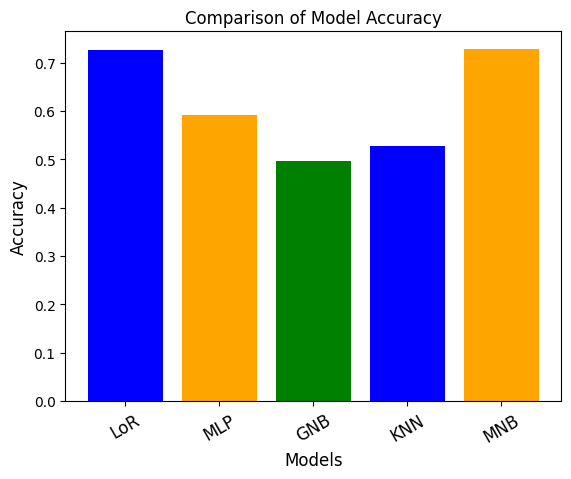

In [35]:
import matplotlib.pyplot as plt

# Define a function to create bar chart
def create_bar_chart(data, labels, title, ylabel):
    index = range(len(data))
    plt.bar(index, data, color=['blue', 'orange', 'green'])
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(index, labels, fontsize=12, rotation=30)
    plt.title(title)
    plt.show()

# Retrieve accuracy values and model names
accuracy_values = result['Accuracy'].values
model_names = result['Model'].values

# Generate the bar chart
create_bar_chart(accuracy_values, model_names, 'Comparison of Model Accuracy', 'Accuracy')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


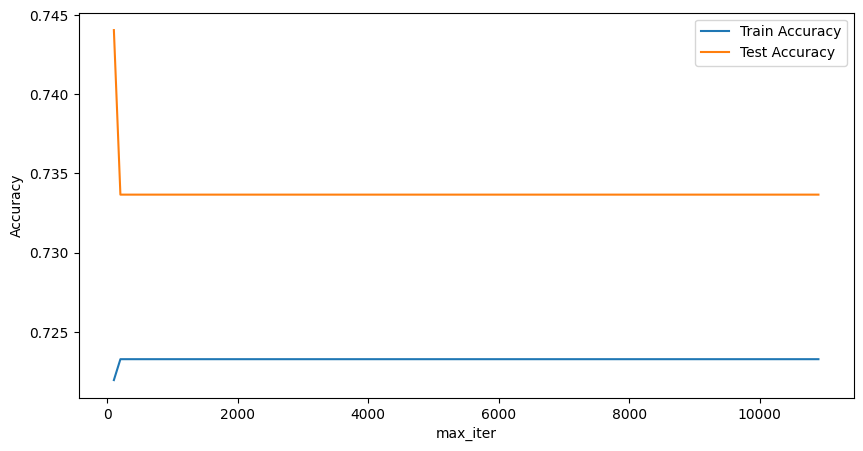

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of values for max_iter
max_iters = list(range(100, 11000, 100))

# Lists to store the results
train_accuracies = []
test_accuracies = []

# Train a model for each value of max_iter
for max_iter in max_iters:
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    
    # Compute the accuracy on the training set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)

    # Compute the accuracy on the test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_iters, train_accuracies, label='Train Accuracy')
plt.plot(max_iters, test_accuracies, label='Test Accuracy')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
import sklearn as sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

new_traffic = df_traffic[['road_name', 'cardinal_direction_name', 'classification_type', 'period', 'traffic_count','crash_count']]

encoded_df = pd.get_dummies(new_traffic, columns=['road_name', 'cardinal_direction_name', 'classification_type', 'period'])

#print(encoded_df.head())
###one hot encoding for some columns, final dataset is df_traffic.  
##add traffic_count as another input and target is crash_count

In [47]:
# Load the one-hot encoded dataset
Traffic_volume_viewer = encoded_df

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Traffic_volume_viewer.drop('crash_count', axis=1), Traffic_volume_viewer['crash_count'], test_size=0.2, random_state=2112)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Evaluate the model using the test data
score = lr.score(X_test, y_test)
print(f'R^2 score: {score}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R^2 score: 0.6496442013756365
Mean Squared Error: 21.151267241907355


In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

def knn_regression(X_train, y_train, X_test, y_test, k):
                    # Train KNN regression model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

            # Make predictions on the test set
    y_pred = knn.predict(X_test)

                # calculate evaluation metrics
    R2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    return R2, mse


In [43]:
k = 90     ####calculated from sqrt(n), where n was 8080
R2, mse = knn_regression(X_train, y_train, X_test, y_test, k)
print("R2 score:", R2)
print("Mean Squared Error:", mse)

R2 score: 0.07751444730567103
Mean Squared Error: 55.691210273805154


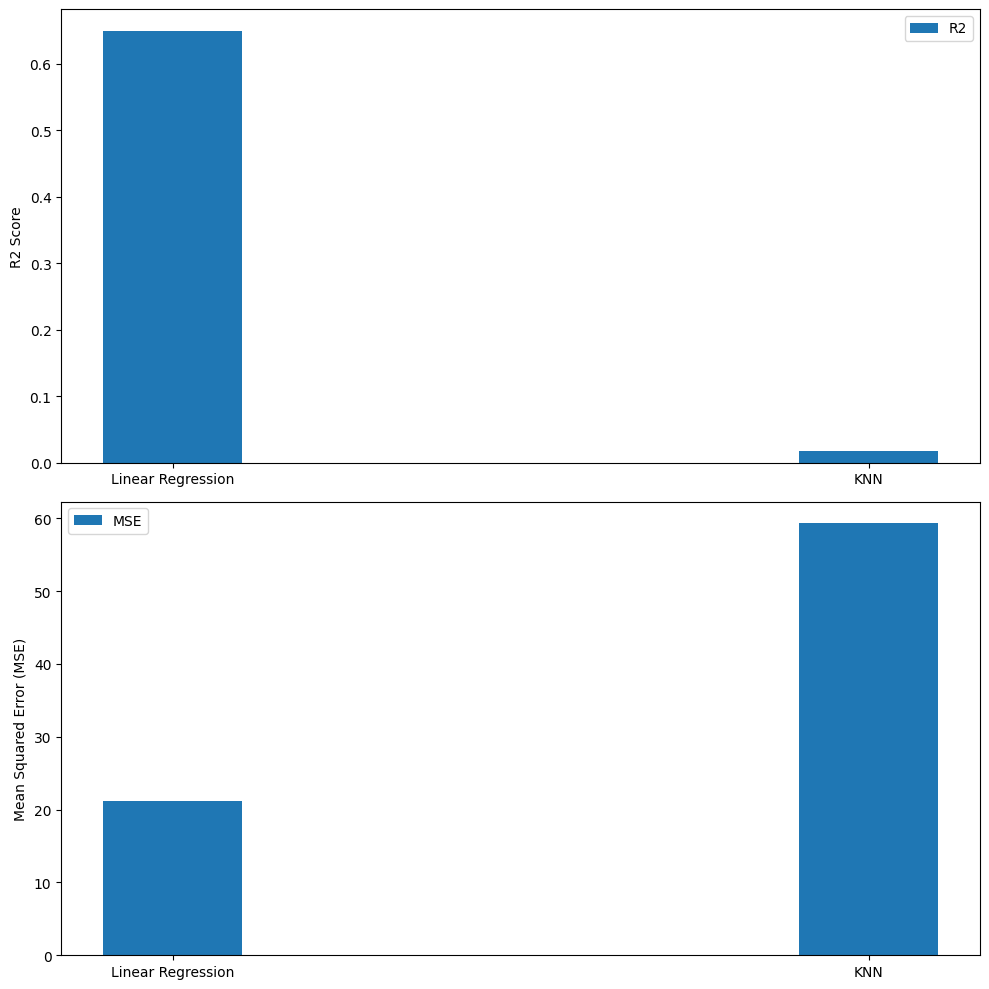

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate R2 and MSE for Linear Regression
lr_r2 = lr.score(X_test, y_test)
lr_mse = mean_squared_error(y_test, y_pred)

# Calculate R2 and MSE for KNN Regression
knn_r2, knn_mse = knn_regression(X_train, y_train, X_test, y_test, k=5)  # replace '5' with the number of neighbors you used

# Prepare data for the bar plot
labels = ['Linear Regression', 'KNN']
r2_scores = [lr_r2, knn_r2]
mse_scores = [lr_mse, knn_mse]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars, reduced as per your request

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# Add bars for R2 scores
rects1 = ax[0].bar(x, r2_scores, width, label='R2')  # removed width/2 for label alignment
ax[0].set_ylabel('R2 Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Add bars for MSE
rects2 = ax[1].bar(x, mse_scores, width, label='MSE')  # removed width/2 for label alignment
ax[1].set_ylabel('Mean Squared Error (MSE)')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

fig.tight_layout()
plt.show()

